## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [11]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars.head()

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB


<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

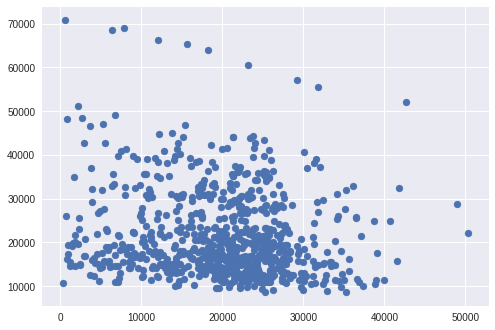

In [13]:
import matplotlib.pyplot as plt
plt.scatter(cars['Mileage'], cars['Price'])
plt.show()

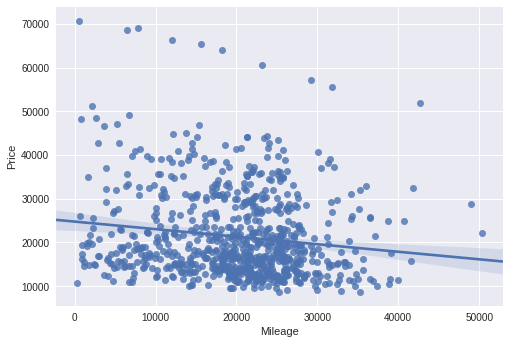

In [14]:
# Using Seaborn
import seaborn as sns

sns.regplot(x='Mileage', y='Price', data=cars)
plt.show()

# You can see a downward trend

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

In [15]:
from sklearn import linear_model
import numpy as np

X = cars['Mileage'].values
y = cars['Price'].values

l = len(X)
X = X.reshape(l, 1)
y = y.reshape(l, 1)

# Linear regression model:
lrm = linear_model.LinearRegression()
lrm.fit(X,y)
print (lrm.intercept_, lrm.coef_)

# Show summary statistics for the model:
# Using statsmodel 
import statsmodels.api as sm
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model.summary()

[24764.5589912] [[-0.1725205]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     16.75
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           4.68e-05
Time:                        07:41:44   Log-Likelihood:                -8527.8
No. Observations:                 804   AIC:                         1.706e+04
Df Residuals:                     802   BIC:                         1.707e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.476e+04    904.363     27.383      0.000     2.3e+04    2.65e+04
x1            -0.1725      0.042     -4.093      0.000      -0.255      -0.090
==============================================================================
Omnibus:                      236.450   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.297
Skew:                           1.522   Prob(JB):                    3.64e-132
Kurtosis:                       5.966   Cond. No.                     5.62e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [16]:
# Command:
print(lrm.coef_)
# One sentence summary:
# One more mile on the car brings the price down by 17 cents since the coefficient is -.17

[[-0.1725205]]


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [17]:
# Single command
print(lrm.intercept_)

[24764.5589912]


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

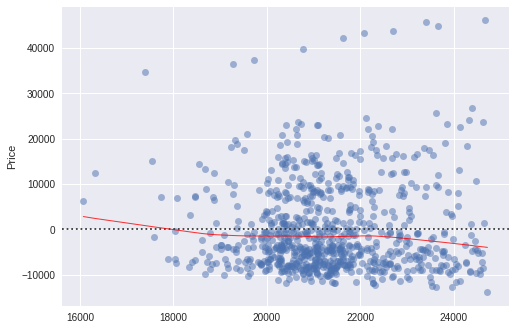

In [18]:
# Plot residuals
model_fitted = model.fittedvalues

plot_lm = plt.figure(1)

plot_lm.axes[0] = sns.residplot(model_fitted, "Price", data=cars,
                               lowess=True,
                               scatter_kws={'alpha': 0.5},
                               line_kws={'color': 'red', 'lw':1, 'alpha':0.8})
plt.show()
# Explain whether there are any problems (1-2 sentence)
# It's not random

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [19]:
# Commands:
import statsmodels.formula.api as smf

feat_cols = ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']
resp_col = 'Price'
X = cars[feat_cols]
y = cars[resp_col]
X = sm.add_constant(X)

lr_model= sm.OLS(y, X)
lr_fit = lr_model.fit()
lr_fit.summary()
# Explanation:
# R-squared statistic is better. F-Test score is higher

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 17 Oct 2018   Prob (F-statistic):           1.23e-98
Time:                        07:41:45   Log-Likelihood:                -8298.9
No. Observations:                 804   AIC:                         1.661e+04
Df Residuals:                     797   BIC:                         1.664e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7323.1646   1770.837      4.135      0.000    3847.110    1.08e+04
Mileage       -0.1705      0.032     -5.352      0.000      -0.233      -0.108
Cylinder    3200.1246    202.983     15.765      0.000    2801.680    3598.570
Doors      -1463.3991    308.274     -4.747      0.000   -2068.525    -858.273
Cruise      6205.5113    651.463      9.525      0.000    4926.724    7484.298
Sound      -2024.4011    570.718     -3.547      0.000   -3144.690    -904.113
Leather     3327.1435    597.114      5.572      0.000    2155.041    4499.246
==============================================================================
Omnibus:                      145.941   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.863
Skew:                           1.098   Prob(JB):                     6.15e-57
Kurtosis:                       4.703   Cond. No.                     1.48e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

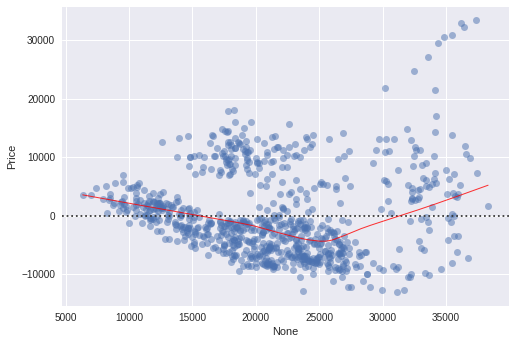

In [20]:
fitted_vals = lr_fit.fittedvalues

plot_lm = plt.figure(1)

plot_lm.axes[0] = sns.residplot(fitted_vals, "Price", data=cars,
                               lowess=True,
                               scatter_kws={'alpha': 0.5},
                               line_kws={'color': 'red', 'lw':1, 'alpha':0.8})
plt.show()


<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [22]:
# Command(s):
#sns.pairplot(cars)
#sns.plt.show()

cars_f = cars[feat_cols]
cars_f.corr()
# Comment on the result
# No Colinear variables

,Mileage,Cylinder,Doors,Cruise,Sound,Leather
Mileage,1.000000,-0.029461,-0.016944,0.025037,-0.026146,0.001005
Cylinder,-0.029461,1.000000,0.002206,0.354285,-0.089704,0.075520
Doors,-0.016944,0.002206,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.025037,0.354285,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.026146,-0.089704,-0.062530,-0.091730,1.000000,0.165444
Leather,0.001005,0.075520,-0.061969,-0.070573,0.165444,1.000000


<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [23]:
# chevy= ["Mileage"=30000, "Cylinder"=4, "Doors"=2, "Cruise"=1, "Sound":1, "Leather":1]
feat_cols = ['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']

chevy = dict({'0': {"Mileage":30000,
                    "Cylinder":4,
                    "Doors":2,
                    "Cruise":1,
                    "Sound":1,
                    "Leather":1}})

car = pd.DataFrame.from_dict(chevy).T
car = car[feat_cols]
car = sm.add_constant(car, has_constant='')
print(car)
# Commands that estimate the price of 'chevy' using the model with 6 predictors

pred = lr_fit.predict(car)
print('\nThe expected price of the Chevy described is ${:.2F}'.format(pred[0]))


   const  Mileage  Cylinder  Doors  Cruise  Sound  Leather
0    1.0    30000         4      2       1      1        1

The expected price of the Chevy described is $19589.61


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     607.2
Date:                Wed, 17 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:19:03   Log-Likelihood:                -7544.8
No. Observations:                 804   AIC:                         1.512e+04
Df Residuals:                     789   BIC:                         1.519e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5095.0985    281.571     18.095      

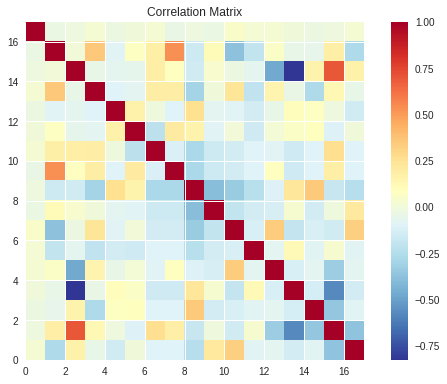

    VIF Factor     features
0     1.007864      Mileage
1     2.351554     Cylinder
2          inf        Doors
3     1.553011       Cruise
4     1.140603        Sound
5     1.186763      Leather
6          inf        Buick
7          inf     Cadillac
8          inf        Chevy
9          inf      Pontiac
10         inf         Saab
11         inf       Saturn
12         inf  convertible
13         inf        coupe
14         inf    hatchback
15         inf        sedan
16         inf        wagon


/usr/local/lib/python3.5/dist-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [39]:
# Commands
feat_cols = cars.columns.drop(['Price'])
y_all = cars['Price']
X_all = cars[feat_cols]
X_all = sm.add_constant(X_all)

lr_model_all = sm.OLS(y_all, X_all)
print(lr_fit.summary())

# Create new chevy with full details:
chevy = dict({'0': {"Mileage":30000,
                    "Cylinder":4,
                    "Doors":2,
                    "Cruise":1,
                    "Sound":1,
                    "Leather":1,
                    "Buick":0,
                    "Cadillac":0,
                    "Chevy":1,
                    "Pontiac":0,
                    "Saab":0,
                    "Saturn":0,
                    "convertible":0,
                    "coupe":1,
                    "hatchback":0,
                    "sedan":0, 
                    "wagon":0}})

car = pd.DataFrame.from_dict(chevy).T
car = car[feat_cols]
car = sm.add_constant(car, has_constant='')
print(car)

cars_f = cars[feat_cols]
print(cars_f.corr())
pred = lr_fit.predict(car)
print('\nThe expected price of the Chevy described is ${:.2F}'.format(pred[0]))

# Command(s):
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_corr(cars_f.corr())
plt.show()

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = cars[feat_cols]

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
print(vif)


# Comments on problems
# The prediction is wildly different when you include all the variables. The question is, which model is better?
# The R statistic shows a higher value in this model